# Day 3


In [ ]:
import pandas as pd



In [27]:
data_path = '../Materials/data/'

the min of vr is:  -328.82
the max of vr is:  -323.14
the min of sigma is:  7.85
the max of sigma is:  12.43


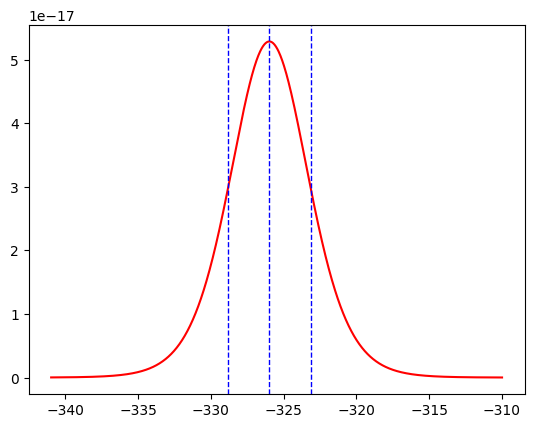

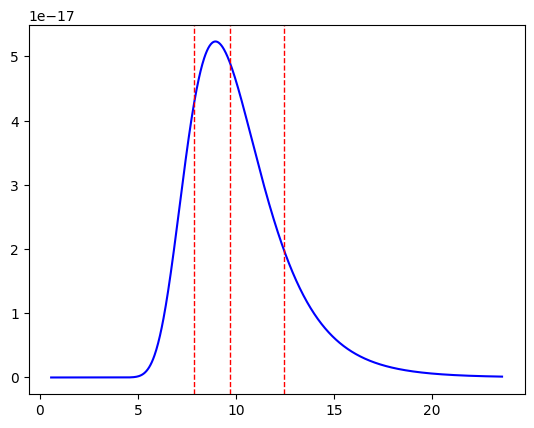

In [28]:
#using the first method: 

import numpy as np
import matplotlib.pyplot as plt
import math

# 定义 likelihood 函数
def likelihood(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, vr, sigma):
    re = -6 * np.log(2 * np.pi) - 12 * np.log(sigma) - (
        (v1 - vr)**2 + (v2 - vr)**2 + (v3 - vr)**2 + (v4 - vr)**2 +
        (v5 - vr)**2 + (v6 - vr)**2 + (v7 - vr)**2 + (v8 - vr)**2 +
        (v9 - vr)**2 + (v10 - vr)**2 + (v11 - vr)**2 + (v12 - vr)**2
    ) / (2 * sigma**2)
    return re

# 已知的最大值对应的参数
vr_max = -325.98
sigma_max = 8.57

# 参数范围（可以根据实际情况调整）
vr_range = np.linspace(vr_max - 15, vr_max + 16, 1000)
sigma_range = np.linspace(sigma_max - 8, sigma_max + 15, 1000)

vr,sigma=np.meshgrid(vr_range,sigma_range)

# 固定 v1 到 v12 的值
v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12 = (
    -344.73, -323.98, -319.18, -327.82, -321.96, -313.30,
    -334.14, -333.23, -321.67, -314.25, -330.85, -326.63
)

# 计算 likelihood 函数值
likelihood_values = np.exp(likelihood(
    v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12,
    vr, sigma
))

a=0
b=0
p=0
q=0


vr_sums = likelihood_values.sum(axis=0)
vrsum=sum(vr_sums)
plt.figure(1)
plt.plot(vr_range,vr_sums,color="red")
for i in range(1000):
    a=a+vr_sums[i]
    if (a/vrsum>0.16 and p==0): 
        print("the min of vr is: ", "%.2f" % vr_range[i] )
        p=1
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1, label='16th percentile')
    if (a/vrsum>0.5 and p==1): 
        p=2
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1, label='16th percentile')
    if (a/vrsum>0.84 and p==2):
        print("the max of vr is: ", "%.2f" % vr_range[i])
        p=3
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1, label='84th percentile')


sigma_sums = likelihood_values.sum(axis=1)
sigmasum=sum(sigma_sums)
plt.figure(2)
plt.plot(sigma_range,sigma_sums,color="blue")
for i in range(1000):
    b=b+sigma_sums[i]
    if (b/sigmasum>0.16 and q==0): 
        print("the min of sigma is: ", "%.2f" % sigma_range[i] )
        q=1
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
    if (b/sigmasum>0.5 and q==1): 
        q=2
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
    if (b/sigmasum>0.84 and q==2):
        print("the max of sigma is: ", "%.2f" % sigma_range[i])
        q=3
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)

#the three lines respectively represents 16%, 50%, 84%

the min of vr is:  -328.60
the peak of vr is:  -325.99
the max of vr is:  -323.32
the min of vr is:  7.34
the peak of vr is:  8.93
the max of vr is:  11.28


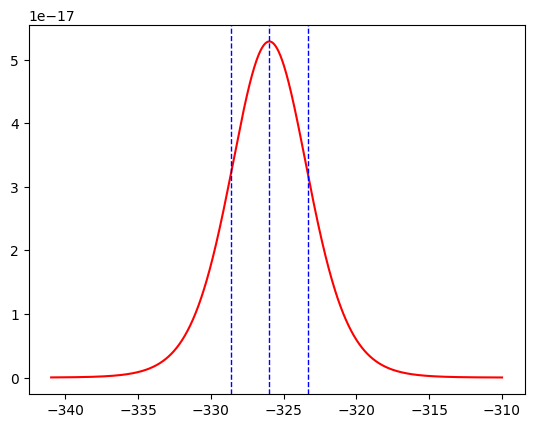

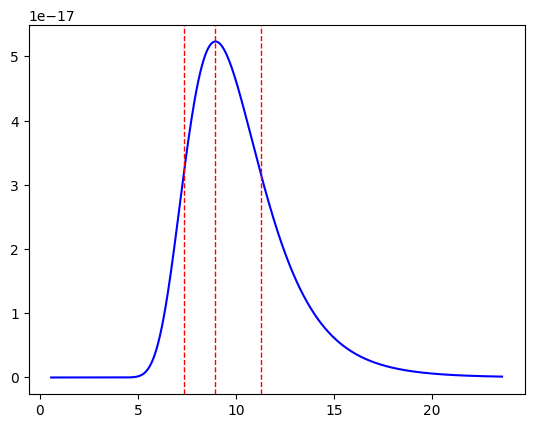

In [29]:
#using the second method: 

import numpy as np
import matplotlib.pyplot as plt
import math

# 定义 likelihood 函数
def likelihood(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, vr, sigma):
    re = -6 * np.log(2 * np.pi) - 12 * np.log(sigma) - (
        (v1 - vr)**2 + (v2 - vr)**2 + (v3 - vr)**2 + (v4 - vr)**2 +
        (v5 - vr)**2 + (v6 - vr)**2 + (v7 - vr)**2 + (v8 - vr)**2 +
        (v9 - vr)**2 + (v10 - vr)**2 + (v11 - vr)**2 + (v12 - vr)**2
    ) / (2 * sigma**2)
    return re

# 已知的最大值对应的参数
vr_max = -325.98
sigma_max = 8.57

# 参数范围（可以根据实际情况调整）
vr_range = np.linspace(vr_max - 15, vr_max + 16, 1000)
sigma_range = np.linspace(sigma_max - 8, sigma_max + 15, 1000)

vr,sigma=np.meshgrid(vr_range,sigma_range)

# 固定 v1 到 v12 的值
v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12 = (
    -344.73, -323.98, -319.18, -327.82, -321.96, -313.30,
    -334.14, -333.23, -321.67, -314.25, -330.85, -326.63
)

# 计算 likelihood 函数值
likelihood_values = np.exp(likelihood(
    v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12,
    vr, sigma
))


p=q=0


vr_sums = likelihood_values.sum(axis=0)
vrsum=sum(vr_sums)
max1=max(vr_sums)
plt.figure(1)
plt.plot(vr_range,vr_sums,color="red")
for i in range(1000):
    if (vr_sums[i]/max1>0.6065 and p==0): 
        print("the min of vr is: ", "%.2f" % vr_range[i] )
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
        p=1
    if (vr_sums[i]/max1>0.9999 and p==1): 
        print("the peak of vr is: ", "%.2f" % vr_range[i] )
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
        p=2
    if (vr_sums[i]/max1<0.6065 and p==2):
        print("the max of vr is: ", "%.2f" % vr_range[i])
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
        p=3


sigma_sums = likelihood_values.sum(axis=1)
sigmasum=sum(sigma_sums)
max2=max(sigma_sums)
plt.figure(2)
plt.plot(sigma_range,sigma_sums,color="blue")
for i in range(1000):
    if (sigma_sums[i]/max2>0.6065 and q==0): 
        print("the min of vr is: ", "%.2f" % sigma_range[i] )
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
        q=1
    if (sigma_sums[i]/max2>0.9999 and q==1): 
        print("the peak of vr is: ", "%.2f" % sigma_range[i] )
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
        q=2
    if (sigma_sums[i]/max2<0.6065 and q==2):
        print("the max of vr is: ", "%.2f" % sigma_range[i])
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
        q=3

#the first and third lines represent the acceptable range, and the second line represents the peak

the min of vr is:  -328.82
the max of vr is:  -323.09
the min of sigma is:  7.87
the max of sigma is:  12.62


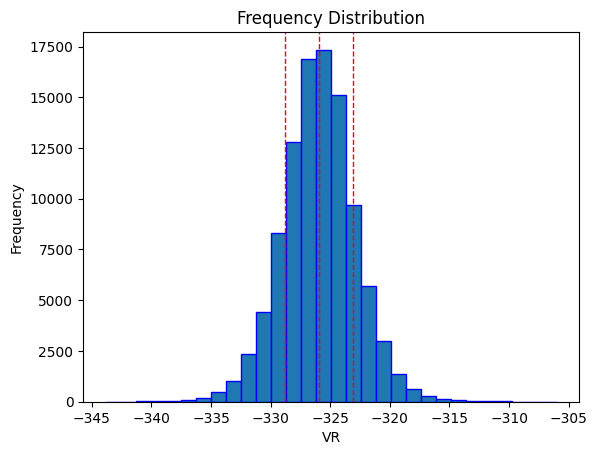

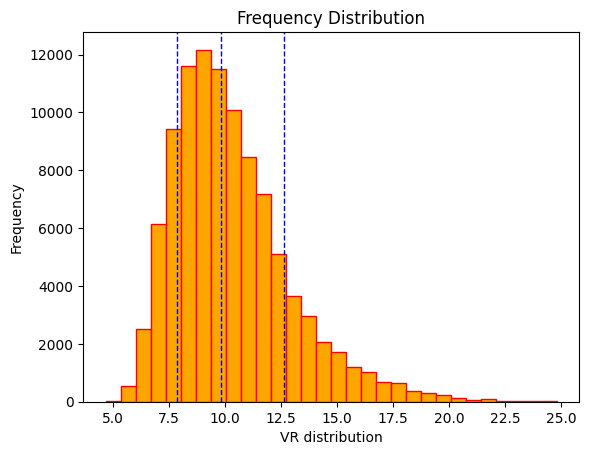

In [30]:
#using the first method based on data given by MCMC

import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv('output.csv')

# 转换为二维数组（NumPy 数组）
array = df.values  # 或者 df.to_numpy()

vr_datas=array[:,1]
sigma_datas=array[:,2]


# 绘制频率分布柱状图（直方图）
plt.figure(1)
plt.hist(vr_datas, bins=30, edgecolor='blue')  # bins 是柱子数量
plt.title('Frequency Distribution')
plt.xlabel('VR')
plt.ylabel('Frequency')
vr_min= np.percentile(vr_datas, 16)
plt.axvline(vr_min, color='red', linestyle='dashed', linewidth=1)
vr_peak= np.percentile(vr_datas, 50)
plt.axvline(vr_peak, color='red', linestyle='dashed', linewidth=1)
vr_max= np.percentile(vr_datas, 84)
plt.axvline(vr_max, color='red', linestyle='dashed', linewidth=1)

plt.figure(2)
plt.hist(sigma_datas, bins=30, edgecolor='red',color="orange")  # bins 是柱子数量
plt.title('Frequency Distribution')
plt.xlabel('VR distribution')
plt.ylabel('Frequency')
sigma_min= np.percentile(sigma_datas, 16)
plt.axvline(sigma_min, color='blue', linestyle='dashed', linewidth=1)
sigma_peak= np.percentile(sigma_datas, 50)
plt.axvline(sigma_peak, color='blue', linestyle='dashed', linewidth=1)
sigma_max= np.percentile(sigma_datas, 84)
plt.axvline(sigma_max, color='blue', linestyle='dashed', linewidth=1)

print("the min of vr is: ", "%.2f" % vr_min)
print("the max of vr is: ", "%.2f" % vr_max)
print("the min of sigma is: ", "%.2f" % sigma_min)
print("the max of sigma is: ", "%.2f" % sigma_max)


plt.show()


the min of vr is:  -337.78
the min of vr is:  -329.01
the max of vr is:  -320.06
the min of vr is:  9.75
the min of vr is:  15.22
the max of vr is:  25.89


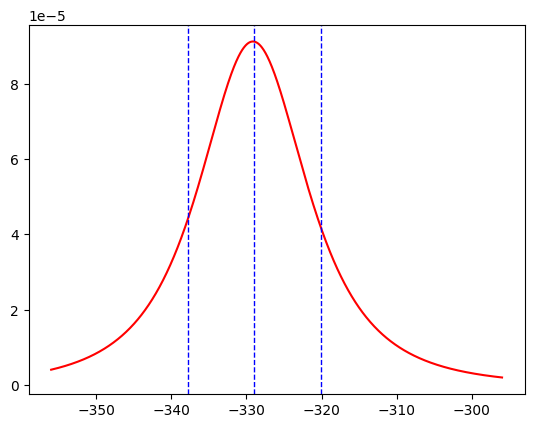

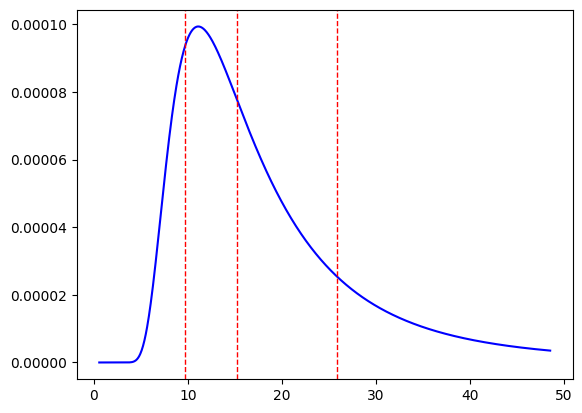

In [31]:
#what will happen if there is only 4 datapoints?(method 1)
import numpy as np
import matplotlib.pyplot as plt
import math

# 定义 likelihood 函数
def likelihood(v1, v2, v3, v4, vr, sigma):
    re = -2 * np.log(2 * np.pi) - 4 * np.log(sigma) - (
        (v1 - vr)**2 + (v2 - vr)**2 + (v3 - vr)**2 + (v4 - vr) ) / (2 * sigma**2)
    return re

# 已知的最大值对应的参数
vr_max = -325.98
sigma_max = 8.57

# 参数范围（可以根据实际情况调整）
vr_range = np.linspace(vr_max - 30, vr_max + 30, 1000)
sigma_range = np.linspace(sigma_max - 8, sigma_max + 40, 1000)

vr,sigma=np.meshgrid(vr_range,sigma_range)

# 固定 v1 到 v12 的值
v1, v2, v3, v4, v5= (-344.73, -323.98, -319.18, -327.82, -321.96)

# 计算 likelihood 函数值
likelihood_values = np.exp(likelihood(
    v1, v2, v3, v4, vr, sigma))

a=0
b=0
p=0
q=0

vr_sums = likelihood_values.sum(axis=0)
vrsum=sum(vr_sums)
plt.figure(1)
plt.plot(vr_range,vr_sums,color="red")
for i in range(1000):
    a=a+vr_sums[i]
    if (a/vrsum>0.16 and p==0): 
        print("the min of vr is: ", "%.2f" % vr_range[i] )
        p=1
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
    if (a/vrsum>0.5 and p==1): 
        print("the min of vr is: ", "%.2f" % vr_range[i] )
        p=2
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
    if (a/vrsum>0.84 and p==2):
        print("the max of vr is: ", "%.2f" % vr_range[i])
        p=3
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)


sigma_sums = likelihood_values.sum(axis=1)
sigmasum=sum(sigma_sums)
plt.figure(2)
plt.plot(sigma_range,sigma_sums,color="blue")
for i in range(1000):
    b=b+sigma_sums[i]
    if (b/sigmasum>0.16 and q==0): 
        print("the min of vr is: ", "%.2f" % sigma_range[i] )
        q=1
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
    if (b/sigmasum>0.5 and q==1): 
        print("the min of vr is: ", "%.2f" % sigma_range[i] )
        q=2
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
    if (b/sigmasum>0.84 and q==2):
        print("the max of vr is: ", "%.2f" % sigma_range[i])
        q=3
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)



the min of vr is:  -335.98
the peak of vr is:  -329.19
the max of vr is:  -322.17
the min of vr is:  7.78
the peak of vr is:  11.04
the max of vr is:  17.77


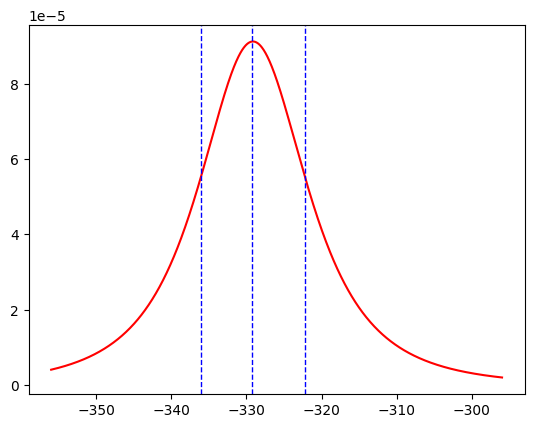

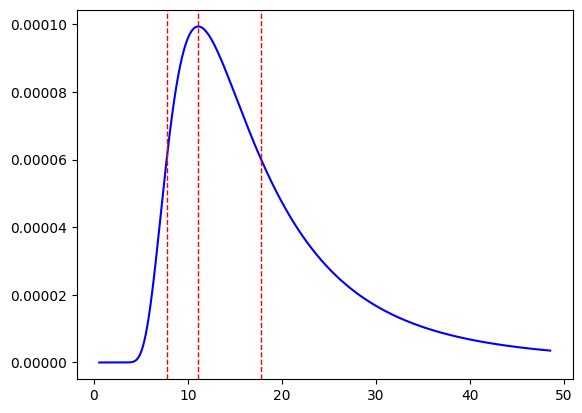

In [32]:
#what will happen if we only have 4 datapoints?(method 2)
import numpy as np
import matplotlib.pyplot as plt
import math

# 定义 likelihood 函数
def likelihood(v1, v2, v3, v4, vr, sigma):
    re = -2 * np.log(2 * np.pi) - 4 * np.log(sigma) - (
        (v1 - vr)**2 + (v2 - vr)**2 + (v3 - vr)**2 + (v4 - vr) ) / (2 * sigma**2)
    return re

# 已知的最大值对应的参数
vr_max = -325.98
sigma_max = 8.57

# 参数范围（可以根据实际情况调整）
vr_range = np.linspace(vr_max - 30, vr_max + 30, 1000)
sigma_range = np.linspace(sigma_max - 8, sigma_max + 40, 1000)

vr,sigma=np.meshgrid(vr_range,sigma_range)

# 固定 v1 到 v12 的值
v1, v2, v3, v4, v5= (-344.73, -323.98, -319.18, -327.82, -321.96)

# 计算 likelihood 函数值
likelihood_values = np.exp(likelihood(
    v1, v2, v3, v4, vr, sigma))

p=q=0

vr_sums = likelihood_values.sum(axis=0)
vrsum=sum(vr_sums)
max1=max(vr_sums)
plt.figure(1)
plt.plot(vr_range,vr_sums,color="red")
for i in range(1000):
    if (vr_sums[i]/max1>0.6065 and p==0): 
        print("the min of vr is: ", "%.2f" % vr_range[i] )
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
        p=1
    if (vr_sums[i]/max1>0.9999 and p==1): 
        print("the peak of vr is: ", "%.2f" % vr_range[i] )
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
        p=2
    if (vr_sums[i]/max1<0.6065 and p==2):
        print("the max of vr is: ", "%.2f" % vr_range[i])
        plt.axvline(vr_range[i], color='blue', linestyle='dashed', linewidth=1)
        p=3


sigma_sums = likelihood_values.sum(axis=1)
sigmasum=sum(sigma_sums)
max2=max(sigma_sums)
plt.figure(2)
plt.plot(sigma_range,sigma_sums,color="blue")
for i in range(1000):
    if (sigma_sums[i]/max2>0.6065 and q==0): 
        print("the min of vr is: ", "%.2f" % sigma_range[i] )
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
        q=1
    if (sigma_sums[i]/max2>0.9999 and q==1): 
        print("the peak of vr is: ", "%.2f" % sigma_range[i] )
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
        q=2
    if (sigma_sums[i]/max2<0.6065 and q==2):
        print("the max of vr is: ", "%.2f" % sigma_range[i])
        plt.axvline(sigma_range[i], color='red', linestyle='dashed', linewidth=1)
        q=3

